Import potřebných knihoven.

In [25]:
from pytworkpy import visual, network
import torch
import torchvision

Vytvoření instancí potřebnych tříd. Network pro samotnou práci se sítí. Vstupní parametr v jejím konstruktoru je cesta k potřebným datům.

In [26]:
net_shape = {'con1': (1, 6, 5), 'pool': (2, 2), 'con2': (6, 16, 5), 'lin1': (4*4*16, 256), 'lin2': (256, 120), 'lin3': (120, 10)}
model = network.SimpleMNISTClassifier(net_shape)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum=0.1)
loss_fn = torch.nn.CrossEntropyLoss()

net = network.Network("./data", model=model, optimizer=optimizer, loss_fn=loss_fn)

Volání funkce, která trénuje neuronovou síť uvnitř 'Network'. Funkce vrací typle průběhů chybové funkce při trénování a testování.

In [45]:
loss_graph = net.train_network(epochs=5)

EPOCH: 1
0.66 % done. Last loss: 0.5767859220504761
7.33 % done. Last loss: 0.575674831867218
13.99 % done. Last loss: 0.0018697241321206093
20.66 % done. Last loss: 0.00028064142679795623
27.33 % done. Last loss: 0.5756466388702393
33.99 % done. Last loss: 3.576276128569589e-07
40.66 % done. Last loss: 0.6620748043060303
47.33 % done. Last loss: 0.003507686546072364
53.99 % done. Last loss: 0.5774832367897034
60.66 % done. Last loss: 0.5756477117538452
67.33 % done. Last loss: 0.0031263595446944237
73.99 % done. Last loss: 0.5756609439849854
80.66 % done. Last loss: 0.5756463408470154
87.33 % done. Last loss: 0.00013059064804110676
93.99 % done. Last loss: 1.072882469088654e-06
EPOCH: 2
0.66 % done. Last loss: 0.00012494053225964308
7.33 % done. Last loss: 1.7881390590446244e-07
13.99 % done. Last loss: 1.519915940662031e-06


Nyní vykreslíme průběh chyby při trénování pomocí modulu visual.

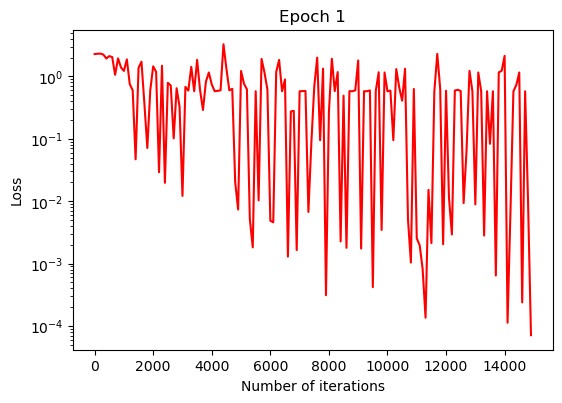

In [28]:
training_loss = loss_graph

vc = visual.Visual((6,4), 'red', (0.1, 0.1, 0.8, 0.8))

vc.plot_loss_per_epoch(training_loss)

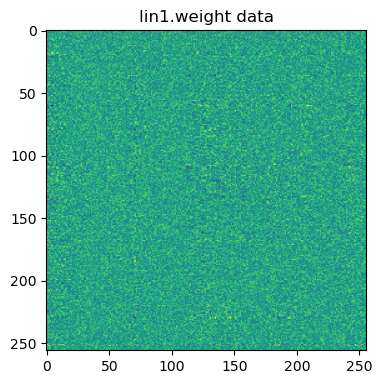

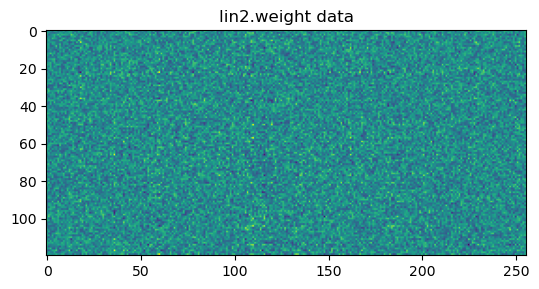

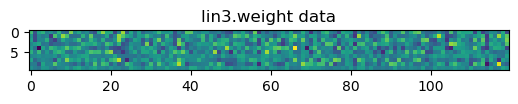

In [29]:
vc.plot_model_lin_weights(net.model)

Otestujeme, jestli natrénovaná neuronová síť umí rozpoznat číslici v 'test.png'.

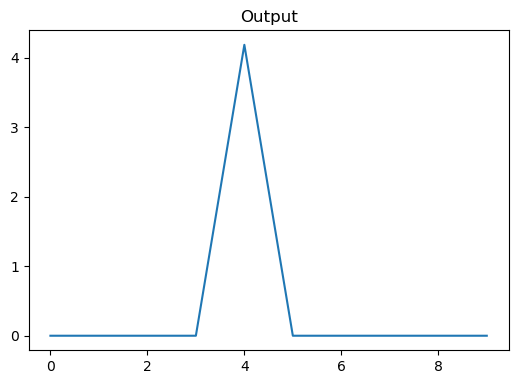

In [30]:
out = net.mnist_digit_classify("test.png")
vc.plot_output(out)

Testování na separátních datech...

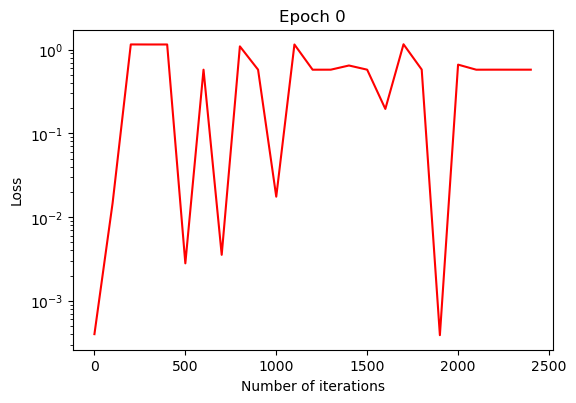

In [31]:
test_loss = net.test_network()

vc.plot_loss(0, test_loss)

Uložíme momentální stav parametrů neuronové sítě do hdf5 souboru...

In [32]:
net.save_as_h5("mnist_model.h5")

... a vytvoříme novou neuronovou síť, do které už data jenom načteme.

In [33]:
model2 = network.SimpleMNISTClassifier(net_shape)
net2 = network.Network("./data", model2, optimizer, loss_fn)
net2.load_from_h5("mnist_model.h5")

Vidíme, že načtená neuronová síť dává stejný výsledek jako ta předchozí.

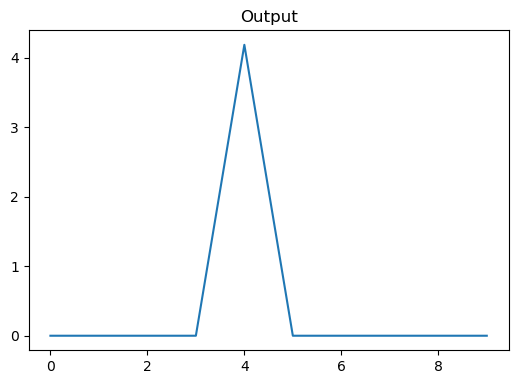

In [34]:
out = net2.mnist_digit_classify("test.png")
vc.plot_output(out)

Na závěr ještě vyzkoušíme jiný trénovací algoritmus (Adam).

In [40]:
sec_net_shape = {'con1': (1, 6, 5), 'pool': (2, 2), 'con2': (6, 16, 5), 'lin1': (4*4*16, 256), 'lin2': (256, 120), 'lin3': (120, 10)}
sec_model = network.SimpleMNISTClassifier(sec_net_shape)
sec_optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
sec_loss_fn = torch.nn.CrossEntropyLoss()

sec_net = network.Network("./data", model=model, optimizer=optimizer, loss_fn=loss_fn)

In [41]:
sec_loss = sec_net.train_network(epochs=3)

EPOCH: 1
0.66 % done. Last loss: 0.5759894251823425
7.33 % done. Last loss: 0.5756832957267761
13.99 % done. Last loss: 0.5757134556770325
20.66 % done. Last loss: 1.1513493061065674
27.33 % done. Last loss: 0.00017711278633214533
33.99 % done. Last loss: 0.5756859183311462
40.66 % done. Last loss: 2.354372327317833e-06
47.33 % done. Last loss: 0.0017250870587304235
53.99 % done. Last loss: 5.364415187614213e-07
60.66 % done. Last loss: 0.00023551969206891954
67.33 % done. Last loss: 0.5756757855415344
73.99 % done. Last loss: 0.028377749025821686
80.66 % done. Last loss: 5.03654746353277e-06
87.33 % done. Last loss: 0.001526945037767291
93.99 % done. Last loss: 0.0021816834341734648
EPOCH: 2
0.66 % done. Last loss: 0.0
7.33 % done. Last loss: 0.5759112238883972
13.99 % done. Last loss: 0.5766142010688782
20.66 % done. Last loss: 1.4901156930591242e-07
27.33 % done. Last loss: 3.5464574921206804e-06
33.99 % done. Last loss: 0.00011296308366581798
40.66 % done. Last loss: 0.137940555810

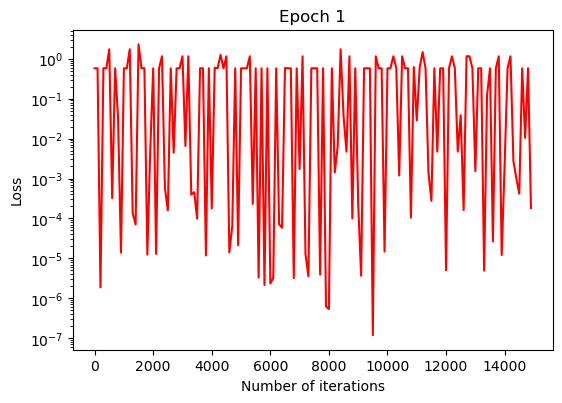

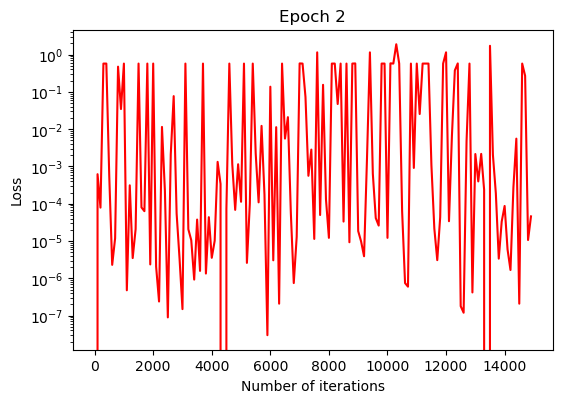

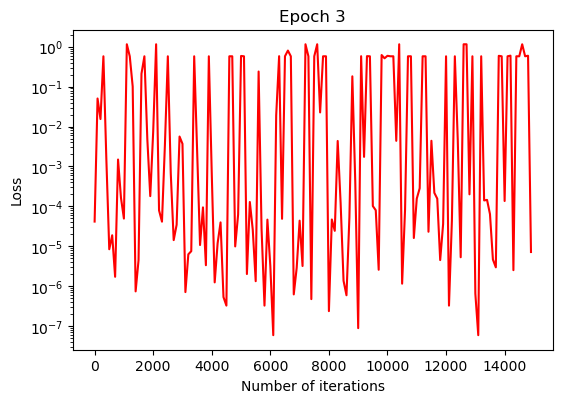

In [42]:
vc.plot_loss_per_epoch(sec_loss)

A porovnáme...

In [43]:
sec_test_loss = sec_net.test_network()

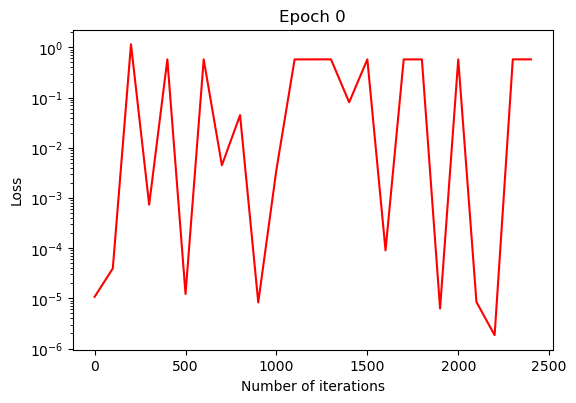

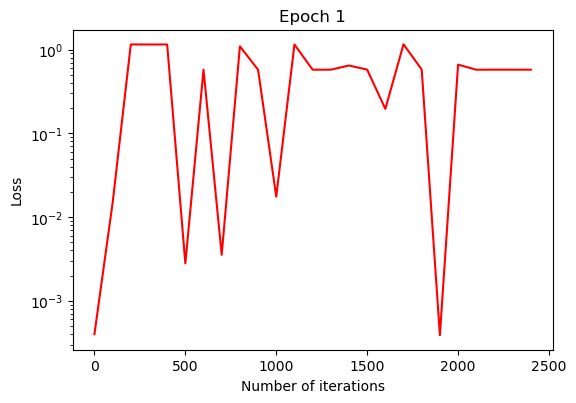

In [44]:
vc.plot_loss(0, sec_test_loss)
vc.plot_loss(1, test_loss)